In [11]:
# importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import plotly.express as px

In [12]:
# cargar el dataset
df = pd.read_csv(r'/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/data/calendar.csv')

In [13]:
# Primeras filas del dataset
df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,96033,2025-03-29,f,$59.00,NaN,3.0,1125.0
1,96033,2025-03-30,f,$59.00,NaN,3.0,1125.0
2,96033,2025-03-31,f,$59.00,NaN,3.0,1125.0
3,96033,2025-04-01,f,$59.00,NaN,3.0,1125.0
4,96033,2025-04-02,f,$59.00,NaN,3.0,1125.0


In [14]:
# informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3511909 entries, 0 to 3511908
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 187.6+ MB


In [15]:
import numpy as np

# No panda warnings
pd.set_option('future.no_silent_downcasting', True)

# Convertir 'date' a tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Convertir 'available' a tipo booleano
df['available'] = df['available'].astype(bool)

# Limpiar y convertir columnas de precio
for col in ['price', 'adjusted_price']:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .replace({'nan': np.nan, 'NaN': np.nan, '': np.nan})
        .replace(r'[\$,]', '', regex=True)
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir 'minimum_nights' y 'maximum_nights' a enteros (coerciendo errores)
df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')
df['maximum_nights'] = pd.to_numeric(df['maximum_nights'], errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3511909 entries, 0 to 3511908
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       bool          
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 164.1 MB


In [ ]:
# estadisticas del dataset
df.describe()

         listing_id                           date         price  \
count  3.511909e+06                        3511909  3.511909e+06   
mean   6.352461e+17  2025-09-26 23:44:57.672292096  3.574843e+02   
min    9.603300e+04            2025-03-28 00:00:00  1.000000e+01   
25%    4.222275e+07            2025-06-28 00:00:00  7.000000e+01   
50%    7.731022e+17            2025-09-27 00:00:00  1.000000e+02   
75%    1.131138e+18            2025-12-27 00:00:00  1.630000e+02   
max    1.386258e+18            2026-03-31 00:00:00  9.700000e+04   
std    5.262551e+17                            NaN  2.028808e+03   

       adjusted_price  minimum_nights  maximum_nights  
count             0.0    3.511133e+06    3.511133e+06  
mean              NaN    4.710134e+00    6.589514e+02  
min               NaN    1.000000e+00    1.000000e+00  
25%               NaN    2.000000e+00    3.640000e+02  
50%               NaN    3.000000e+00    7.310000e+02  
75%               NaN    4.000000e+00    1.125000e+

In [17]:
# Duplicados
df.duplicated().sum()

np.int64(0)

In [23]:
# Nulos 
df.isnull().sum()

listing_id              0
date                    0
available               0
price                   0
adjusted_price    3511909
minimum_nights        776
maximum_nights        776
dtype: int64

<Axes: xlabel='price'>

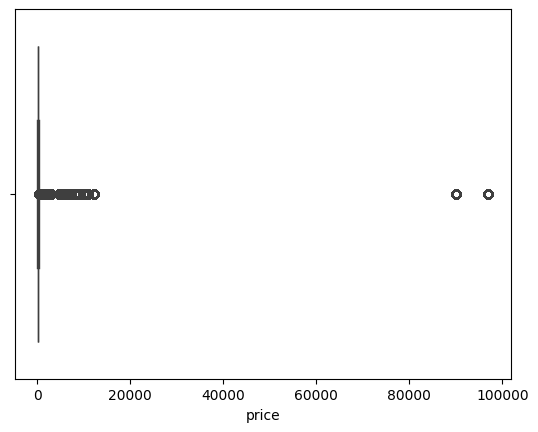

In [24]:
# outliers en 'price'
sns.boxplot(x=df['price'])